# Confidence Intervals

In [1]:
# Libraries
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import t
from scipy.stats import chi2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1
We want to estimate the average size of the men of a country with a confidence level of 80%. Assuming that the standard deviation of the sizes in the population is 4, get the confidence interval with a sample of men selected randomly, whose heights are:

````
heights = [167, 167, 168, 168, 168, 169, 171, 172, 173, 175, 175, 175, 177, 182, 195]
````

**Hint**: function `stats.norm.interval` from `scipy` can help you get through this exercise. 

In [2]:
# your code here
# we already know the real standard deviation?
# sample:
heights = [167, 167, 168, 168, 168, 169, 171, 172, 173, 175, 175, 175, 177, 182, 195]
sample_n = len(heights)
# Endpoints of the range that contains 'alpha' percent of the distribution
alpha = 0.8
# alpha = (1 - des_confidence)/2
mean_h = pd.DataFrame(heights).mean()
std_h  = pd.DataFrame(heights).std()
std_pop = 4
conf_interval = norm.interval(alpha, loc=mean_h, scale=std_pop/np.sqrt(sample_n))
i_0 = round(conf_interval[0][0],2)
i_1 = round(conf_interval[1][0],2)
print(f"Confidence interval of 80% confidence for men's height average is [{i_0},{i_1}]")

Confidence interval of 80% confidence for men's height average is [172.14,174.79]


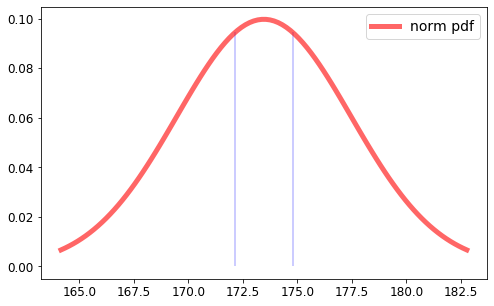

In [3]:
# print that stuff !!!
x = np.linspace(norm.ppf(0.01,loc=mean_h,scale=std_pop),norm.ppf(0.99,loc=mean_h,scale=std_pop), 100)
array = norm.pdf(x,loc=mean_h,scale=std_pop)
plt.figure(figsize=[8,5])
plt.plot(x, array,'r-', lw=5, alpha=0.6, label='norm pdf')
plt.vlines(conf_interval, 0, norm.pdf(conf_interval,loc=mean_h,scale=std_pop), colors='b', lw=2, alpha=0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
# plt.vlines(x, 0, arr, colors='b', lw=2, alpha=0.2)


## Challenge 2 
In a sample of 105 shops selected randomly from an area, we note that 27 of them have had losses in this month. Get an interval for the proportion of businesses in the area with losses to a confidence level of 80% and a confidence level of 90%.

**Hint**: function `stats.norm.interval` from `scipy` can help you get through this exercise. 

In [4]:
# your code here
sample_n    = 105
losses_prop = 27/sample_n
# Endpoints of the range that contains 'alpha' percent of the distribution
alpha = [0.8,0.9]
# Use standard deviation from a Bernoulli distribution
std_pop = bernoulli.std(losses_prop)
conf_interval = [norm.interval(a, loc=losses_prop, scale=std_pop/np.sqrt(sample_n)) for a in alpha]
i_0_08 = round(conf_interval[0][0]*100,2)
i_1_08 = round(conf_interval[0][1]*100,2)
i_0_09 = round(conf_interval[1][0]*100,2)
i_1_09 = round(conf_interval[1][1]*100,2)
print(f"Confidence interval of 80% confidence for losses proportion is [{i_0_08}%,{i_1_08}%]")
print(f"Confidence interval of 90% confidence for losses proportion is [{i_0_09}%,{i_1_09}%]")

Confidence interval of 80% confidence for losses proportion is [20.25%,31.18%]
Confidence interval of 90% confidence for losses proportion is [18.7%,32.73%]


## Challenge 3 - More practice
For the same example in challenge 1, calculate a confidence interval for the variance at 90% level.

**Hint**: function `stats.chi2.interval` from `scipy` can help you get through this exercise. 

<!-- If a sample of size $n$ is taken from a population having a normal distribution, then it allows a test to be made of whether the variance of the population has a pre-determined value.

A test statistic $T$ could be set to be the sum of squares about the sample mean, divided by the nominal value for the variance (i.e. the value to be tested as holding). Then $T$ has a chi-squared distribution with $n − 1$ degrees of freedom. -->

<!-- For example, if the sample size is 21, the acceptance region for T with a significance level of 5% is between 9.59 and 34.17. -->

The sample variance $s^2$ is itself a random variable. In the case that $Y_i$ are independent observations from a normal distribution, *Cochran's theorem* shows that $s^2$ follows a scaled chi-squared distribution:


$\displaystyle(n-1){\frac {s^{2}}{\sigma ^{2}}}\sim \chi _{n-1}^{2}$, therefore,  $\text{C.I.}_{\text{variance}}: \displaystyle \frac{(n-1)s^{2}}{\chi^{2}_{\frac{\alpha}{2}, df}} \leq \sigma^2 \leq \frac{(n-1)s^{2}}{\chi^{2}_{1-\frac{\alpha}{2}, df}}$

In [5]:
# your code here
# Basically here we work on confidence intervals but for the variance, therefore we need to use the chi squared function
# We know the std of POPULATION is 4
heights = [167, 167, 168, 168, 168, 169, 171, 172, 173, 175, 175, 175, 177, 182, 195]
sample_h_var = np.var(heights, ddof=1)
sample_n = len(heights)
# First I'll get the intervals from the scipy function
alpha = 0.9
dof = sample_n - 1
conf_interv = chi2.interval(alpha,dof)
conf_interv = chi2.interval(alpha,dof)
# Thus we need to estimate the intervals for the variance using its formula
conf_var_interv = [dof*sample_h_var/conf_interv[1],dof*sample_h_var/conf_interv[0]]
i_0 = round(conf_var_interv[0],2)
i_1 = round(conf_var_interv[1],2)
print(f"Variance confidence interval at 90% would be [{i_0},{i_1}]")
# could I get directly the intervals using a proper loc and scale from scipy function?
# interval(alpha, df, loc=0, scale=1)

# Now check with internet example (alpha being significance now)
alpha = (1-alpha)
upper = dof * sample_h_var / chi2.ppf(alpha / 2, dof)
lower = dof * sample_h_var / chi2.ppf(1 - alpha / 2, dof)
print(round(lower,2))
print(round(upper,2))
# chi2.ppf(1-alpha / 2, dof)
# chi2.ppf(alpha / 2, dof)


Variance confidence interval at 90% would be [31.99,115.32]
31.99
115.32


## Challenge 4 - More practice
The sulfuric acid content of 7 similar containers is 9.8, 10.2, 10.4, 9.8, 10.0, 10.2 and 9.6 liters. Calculate a 95% confidence interval for the average content of all containers assuming an approximately normal distribution.

```
acid = [9.8, 10.2, 10.4, 9.8, 10.0, 10.2, 9.6]
```

**Hint**: function `stats.t.interval` from `scipy` can help you get through this exercise. 

In [6]:
# your code here
acid = [9.8, 10.2, 10.4, 9.8, 10.0, 10.2, 9.6]
sample_n = len(acid)
# degrees of freedom (dof)
dof = sample_n - 1
# calculate mean and std FROM the sample
mean_acid = pd.DataFrame(acid).mean()
std_acid  = pd.DataFrame(acid).std()
# Endpoints of the range that contains 'alpha' percent of the distribution
alpha = 0.95
conf_interval = t.interval(alpha, dof, loc=mean_acid, scale=std_acid/np.sqrt(sample_n))
i_0 = round(conf_interval[0][0],2)
i_1 = round(conf_interval[1][0],2)
print(f"Confidence interval of 95% confidence for average acid is [{i_0},{i_1}]")

Confidence interval of 95% confidence for average acid is [9.74,10.26]


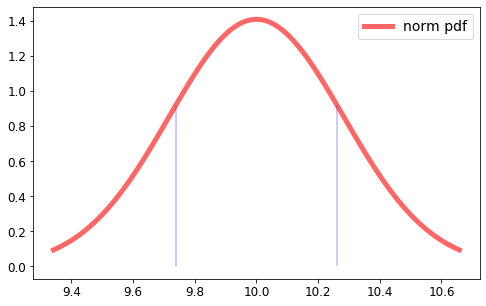

In [7]:
# print that stuff !!!
x = np.linspace(norm.ppf(0.01,loc=mean_acid,scale=std_acid),norm.ppf(0.99,loc=mean_acid,scale=std_acid), 100)
array = norm.pdf(x,loc=mean_acid,scale=std_acid)
plt.figure(figsize=[8,5])
plt.plot(x, array,'r-', lw=5, alpha=0.6, label='norm pdf')
plt.vlines(conf_interval, 0, norm.pdf(conf_interval,loc=mean_acid,scale=std_acid), colors='b', lw=2, alpha=0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

## Bonus Challenge
The error level or sampling error for the first challenge is given by the following expression:
$$Error = z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt n}$$
Where z represents the value for N(0,1)


Suppose that with the previous data of challenge 1, and with a confidence level of
99% (that is, almost certainly) we want to estimate the average population size, so that the error level committed is not greater than half a centimeter.

#### 1.- Determine what size the selected sample of men should be.

In [8]:
# your code here

#### 2.- For the second challenge, we have the following error:
$$ Error = z_{\frac{\alpha}{2}}\sqrt{\frac{p\times q}{n}} $$
#### Determine the sample size required to not exceed an error of 1% with a confidence of 80%.

In [9]:
# your code here

## Bonus Challenge

Let's consider the following problem:

Build a confidence interval of 94% for the real difference between the durations of two brands of spotlights, if a sample of 40 spotlights taken randomly from the first mark gave an average duration of 418 hours, and a sample of 50 bulbs of another brand gave a duration average of 402 hours. The standard deviations of the two
populations are 26 hours and 22 hours, respectively.

Sometimes, we will be interested in the difference of two different groups of random variables. We can also build a confidence interval for that! We have some different cases regarding the variance but for this specific case (the variance are different and known), we have that:

$$\overline{X} - \overline{Y}  \sim N(\mu_{X} - \mu_{Y} , \sqrt{\frac{\sigma_{X}^2}{n_X}+\frac{\sigma_{Y}^2}{n_Y}})$$

Solve the problem with this information.

In [10]:
# your code here